In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("./../ValoresNulos/50_sin_nulos_Bristol_uk.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2644 non-null   int64  
 1   host_name                    2644 non-null   object 
 2   host_since                   2644 non-null   object 
 3   host_location                2644 non-null   object 
 4   host_response_time           2644 non-null   object 
 5   host_response_rate           2644 non-null   float64
 6   host_acceptance_rate         2644 non-null   float64
 7   host_is_superhost            2644 non-null   object 
 8   host_neighbourhood           2644 non-null   object 
 9   host_total_listings_count    2644 non-null   int64  
 10  host_verifications           2644 non-null   object 
 11  host_has_profile_pic         2644 non-null   object 
 12  host_identity_verified       2644 non-null   object 
 13  neighbourhood     

In [27]:
cuantitativas = data[[
    "host_response_rate", "host_acceptance_rate", "host_total_listings_count",
    "latitude", "longitude", "accommodates", "bathrooms", "bedrooms",
    "beds", "minimum_nights", "maximum_nights",
    "minimum_nights_avg_ntm", "maximum_nights_avg_ntm",
    "availability_30", "availability_60", "availability_90",
    "availability_365", "number_of_reviews", "number_of_reviews_ltm",
    "number_of_reviews_l30d",
    "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
    "review_scores_checkin", "review_scores_communication", "review_scores_location",
    "review_scores_value", "reviews_per_month"]]
cualitativas = data[[
    "host_name", "host_since", "host_location", "host_response_time",
    "host_is_superhost",
    "host_neighbourhood", "host_verifications",
    "host_has_profile_pic", "host_identity_verified", "neighbourhood",
    "neighbourhood_cleansed", "property_type",
    "room_type", "bathrooms_text", "amenities", "price",
    "has_availability",
    "license", "instant_bookable", "first_review", "last_review",]]

# cualitativas = data.iloc[:, [0]]
# cualitativas

In [28]:
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   host_name               2644 non-null   object
 1   host_since              2644 non-null   object
 2   host_location           2644 non-null   object
 3   host_response_time      2644 non-null   object
 4   host_is_superhost       2644 non-null   object
 5   host_neighbourhood      2644 non-null   object
 6   host_verifications      2644 non-null   object
 7   host_has_profile_pic    2644 non-null   object
 8   host_identity_verified  2644 non-null   object
 9   neighbourhood           2644 non-null   object
 10  neighbourhood_cleansed  2644 non-null   object
 11  property_type           2644 non-null   object
 12  room_type               2644 non-null   object
 13  bathrooms_text          2644 non-null   object
 14  amenities               2644 non-null   object
 15  pric

<Figure size 1500x800 with 0 Axes>

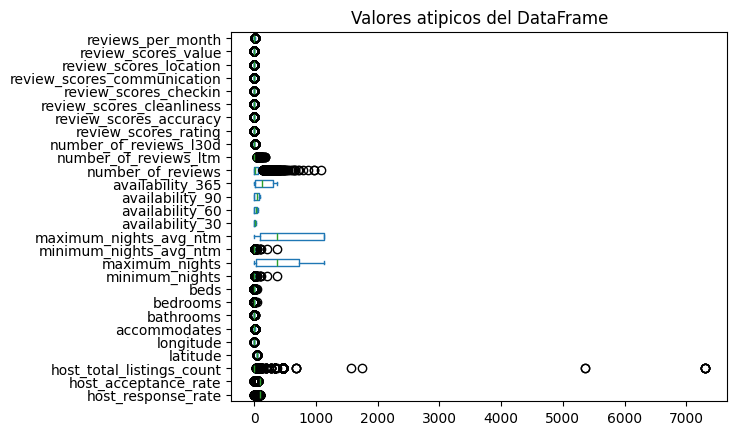

In [29]:
fig = plt.figure(figsize=(15, 8))
#cuantitativas['ventas_precios_corrientes'].plot(kind='box', vert=False)
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores atipicos del DataFrame")
plt.show()

In [30]:
y=cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite_Superior permitido\n", Limite_Superior)
print("Limite inferior permitido\n", Limite_inferior)

Limite_Superior permitido
 host_response_rate              134.532346
host_acceptance_rate            155.550515
host_total_listings_count      1245.873255
latitude                         51.514702
longitude                        -2.507469
accommodates                     10.779128
bathrooms                         3.201490
bedrooms                          6.192944
beds                              7.566886
minimum_nights                   32.639240
maximum_nights                 1700.408304
minimum_nights_avg_ntm           33.466074
maximum_nights_avg_ntm         1928.046196
availability_30                  42.230205
availability_60                  91.844027
availability_90                 144.373480
availability_365                568.943400
number_of_reviews               335.871179
number_of_reviews_ltm            73.811717
number_of_reviews_l30d            7.509650
review_scores_rating              5.842148
review_scores_accuracy            5.941104
review_scores_cleanliness  

In [31]:
data3 = cuantitativas[(y<=Limite_Superior)&(y>=Limite_inferior)]
data3

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,100.0,90.0,7.0,51.438430,-2.591830,2.0,1.0,1.0,1.0,3.0,...,9.0,3.0,4.77,4.89,4.66,4.95,4.94,4.76,4.76,1.47
1,100.0,100.0,2.0,51.449760,-2.610000,2.0,2.5,1.0,1.0,1.0,...,19.0,3.0,4.95,4.94,4.98,4.99,4.98,4.97,4.88,1.22
2,100.0,58.0,2.0,51.441740,-2.602970,1.0,1.0,1.0,1.0,5.0,...,6.0,0.0,4.76,4.72,4.43,4.94,4.94,4.75,4.72,0.39
3,100.0,96.0,4.0,51.464870,-2.556900,2.0,1.5,1.0,1.0,4.0,...,12.0,0.0,4.74,4.88,4.77,4.93,4.80,4.85,4.73,0.48
4,96.0,86.0,3.0,51.444440,-2.557830,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,4.89,4.88,4.91,4.95,4.93,4.72,4.84,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,98.0,99.0,53.0,51.452780,-2.594400,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,4.70,4.00,4.80,4.80,4.00,4.80,4.80,1.00
2640,96.0,86.0,1.0,51.416840,-2.576380,5.0,1.0,3.0,4.0,2.0,...,0.0,0.0,4.70,4.00,4.80,4.80,4.00,4.80,4.80,1.00
2641,96.0,86.0,1.0,51.471069,-2.573313,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,4.70,4.00,4.80,4.80,4.00,4.80,4.80,1.00
2642,96.0,86.0,1.0,51.486721,-2.545134,2.0,1.0,1.0,1.0,2.0,...,0.0,0.0,4.70,4.00,4.80,4.80,4.00,4.80,4.80,1.00


In [32]:
valores_nulos = data3.isnull().sum()
valores_nulos

host_response_rate             60
host_acceptance_rate           98
host_total_listings_count      10
latitude                        5
longitude                      23
accommodates                   36
bathrooms                      29
bedrooms                       13
beds                           32
minimum_nights                 10
maximum_nights                  0
minimum_nights_avg_ntm         11
maximum_nights_avg_ntm          1
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
number_of_reviews              69
number_of_reviews_ltm          52
number_of_reviews_l30d         52
review_scores_rating           43
review_scores_accuracy         48
review_scores_cleanliness      37
review_scores_checkin          29
review_scores_communication    46
review_scores_location         42
review_scores_value            48
reviews_per_month              49
dtype: int64

In [33]:
data_clean = data3.copy()
data_clean = data_clean.fillna(round(data3.mean(), 1))
data_clean

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,100.0,90.0,7.0,51.438430,-2.591830,2.0,1.0,1.0,1.0,3.0,...,9.0,3.0,4.77,4.89,4.66,4.95,4.94,4.76,4.76,1.47
1,100.0,100.0,2.0,51.449760,-2.610000,2.0,2.5,1.0,1.0,1.0,...,19.0,3.0,4.95,4.94,4.98,4.99,4.98,4.97,4.88,1.22
2,100.0,58.0,2.0,51.441740,-2.602970,1.0,1.0,1.0,1.0,5.0,...,6.0,0.0,4.76,4.72,4.43,4.94,4.94,4.75,4.72,0.39
3,100.0,96.0,4.0,51.464870,-2.556900,2.0,1.5,1.0,1.0,4.0,...,12.0,0.0,4.74,4.88,4.77,4.93,4.80,4.85,4.73,0.48
4,96.0,86.0,3.0,51.444440,-2.557830,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,4.89,4.88,4.91,4.95,4.93,4.72,4.84,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,98.0,99.0,53.0,51.452780,-2.594400,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,4.70,4.00,4.80,4.80,4.00,4.80,4.80,1.00
2640,96.0,86.0,1.0,51.416840,-2.576380,5.0,1.0,3.0,4.0,2.0,...,0.0,0.0,4.70,4.00,4.80,4.80,4.00,4.80,4.80,1.00
2641,96.0,86.0,1.0,51.471069,-2.573313,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,4.70,4.00,4.80,4.80,4.00,4.80,4.80,1.00
2642,96.0,86.0,1.0,51.486721,-2.545134,2.0,1.0,1.0,1.0,2.0,...,0.0,0.0,4.70,4.00,4.80,4.80,4.00,4.80,4.80,1.00


In [34]:
valores_nulos = data_clean.isnull().sum()
valores_nulos

host_response_rate             0
host_acceptance_rate           0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

In [35]:
y = cuantitativas
percentile25 = y.quantile(0.25)
percentile75 = y.quantile(0.75)
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5 *iqr
Limite_inferior_iqr = percentile25 + 1.5*iqr
print("Limite superior permitido \n", Limite_Superior_iqr)
print("Limite inferior permitido \n", Limite_inferior_iqr)

Limite superior permitido 
 host_response_rate              106.000000
host_acceptance_rate            121.000000
host_total_listings_count        26.000000
latitude                         51.499570
longitude                        -2.527779
accommodates                      7.000000
bathrooms                         1.000000
bedrooms                          3.500000
beds                              3.500000
minimum_nights                    6.000000
maximum_nights                 1780.000000
minimum_nights_avg_ntm            5.550000
maximum_nights_avg_ntm         2677.500000
availability_30                  50.000000
availability_60                 117.500000
availability_90                 187.500000
availability_365                725.625000
number_of_reviews               134.000000
number_of_reviews_ltm            43.500000
number_of_reviews_l30d            5.000000
review_scores_rating              5.375000
review_scores_accuracy            5.375000
review_scores_cleanliness 

In [36]:
data3_iqr = cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_inferior_iqr)]
data3_iqr

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,-2.556900,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,-2.557830,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2640,NaN,NaN,NaN,NaN,NaN,5.0,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2642,NaN,NaN,NaN,51.486721,-2.545134,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

host_response_rate             2644
host_acceptance_rate           2644
host_total_listings_count      2595
latitude                       2343
longitude                      2272
accommodates                   2211
bathrooms                       589
bedrooms                       2385
beds                           2436
minimum_nights                 2431
maximum_nights                 2007
minimum_nights_avg_ntm         2432
maximum_nights_avg_ntm         2644
availability_30                2576
availability_60                2644
availability_90                2644
availability_365               2644
number_of_reviews              2450
number_of_reviews_ltm          2396
number_of_reviews_l30d         2258
review_scores_rating           2644
review_scores_accuracy         2644
review_scores_cleanliness      2644
review_scores_checkin          2644
review_scores_communication    2644
review_scores_location         2644
review_scores_value            2644
reviews_per_month           

In [38]:
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(), 1))
data4_iqr

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,21.2,51.500000,-2.500000,5.9,1.0,3.0,3.0,4.6,...,33.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
1,NaN,NaN,21.2,51.500000,-2.500000,5.9,1.0,3.0,3.0,4.6,...,33.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
2,NaN,NaN,21.2,51.500000,-2.500000,5.9,1.0,3.0,3.0,5.0,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
3,NaN,NaN,21.2,51.500000,-2.556900,5.9,1.0,3.0,3.0,4.0,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
4,NaN,NaN,21.2,51.500000,-2.557830,5.9,1.0,3.0,3.0,4.6,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,NaN,NaN,21.2,51.500000,-2.500000,5.9,1.0,3.0,3.0,4.6,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
2640,NaN,NaN,21.2,51.500000,-2.500000,5.0,1.0,3.0,3.0,4.6,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
2641,NaN,NaN,21.2,51.500000,-2.500000,5.9,1.0,3.0,3.0,4.6,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
2642,NaN,NaN,21.2,51.486721,-2.545134,5.9,1.0,3.0,3.0,4.6,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4


In [39]:
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Sarah,2011-01-24,"Bristol, United Kingdom",within an hour,t,Not specified,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,...,33.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
1,Marcus,2011-05-15,"Bristol, United Kingdom",within an hour,t,Not specified,"['email', 'phone']",t,t,Neighborhood highlights,...,33.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
2,Orla,2011-06-16,"Bristol, United Kingdom",within a few hours,f,Not specified,"['email', 'phone']",t,t,Neighborhood highlights,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
3,Wendy,2012-01-08,"Bristol, United Kingdom",within an hour,t,Not specified,"['email', 'phone']",t,t,Neighborhood highlights,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
4,Fiona,2012-03-18,"Bristol, United Kingdom",within an hour,f,Not specified,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,Luke,2017-12-30,"Bristol, United Kingdom",within an hour,t,Not specified,"['email', 'phone', 'work_email']",t,t,No specified,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
2640,Sarah,2024-08-20,No location,within an hour,f,Not specified,['phone'],f,f,No specified,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
2641,Jenna,2020-08-01,"England, United Kingdom",within an hour,f,Not specified,"['email', 'phone']",t,f,No specified,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
2642,Amy,2014-08-07,No location,within an hour,f,Not specified,"['email', 'phone']",t,f,No specified,...,33.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4


In [40]:
Datos_limpios.to_csv("datosLimpiosBristol.csv")